In [11]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
plt.rcParams["figure.figsize"] = (10,8)

In [2]:
df = pd.read_csv('insurance.csv')

In [4]:
print(df.info)
df.head()

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Vẽ biểu đồ để trực quan hóa mối quan hệ giữa tuổi của người được bảo hiểm (age)  với chi phí y tế (charges); và mối quan hệ giữa chỉ số trọng lượng cơ thể (bmi) với chi phí y tế (charges).

Text(0.5, 1.0, 'Biểu đồ thể hiện mối quan hệ giữa chỉ số trọng lượng cơ thể và chi phí y tế ')

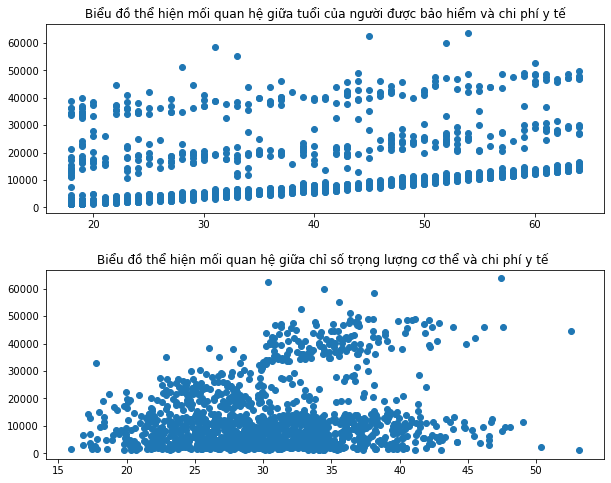

In [9]:
fig, (ax1, ax2) = plt.subplots(2, 1)
plt.subplots_adjust(wspace=0.5, hspace=0.3)
ax1.scatter(df.age, df.charges)
ax1.set_title('Biểu đồ thể hiện mối quan hệ giữa tuổi của người được bảo hiểm và chi phí y tế')
ax2.scatter(df.bmi, df.charges)
ax2.set_title('Biểu đồ thể hiện mối quan hệ giữa chỉ số trọng lượng cơ thể và chi phí y tế ')

Chuyển các biến có kiểu categorical: sex, smoker, region thành các biến “Dummy”: sex_female , sex_male, smoker_no, smoker_yes, region_northeast  region_northwest region_southeast, region_southwest. Sau đó loại bớt 2 trường không cần thiết:  sex_male, smoker_no.

In [13]:
df1 = pd.get_dummies(df)
df1.drop(columns=['sex_male','smoker_no'])

,age,bmi,children,charges,sex_female,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,0,0,0,1


Chia ngẫu nhiên dữ liệu quan sát được thành hai phần dữ liệu huấn luyện và dữ liệu kiểm tra.

In [14]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
y = df1['charges'].values.reshape(-1,1)
X = df1.drop(columns=['charges']).values

In [26]:
X_train, X_test,y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

Xây dựng mô hình hồi quy tuyến tính đa biến với biến dự báo là chi phí y tế, các biến đầu vào là các trường còn lại. Đánh giá mô hình.

In [28]:
LR = LinearRegression().fit(X_train, y_train)
y_prediction = LR.predict(X_test)


In [30]:
score= r2_score(y_test,y_prediction)
score

0.7696118054369012

In [31]:
## mô hình giải thích được hơn 76% 
# mean_squared_error = mean_squared_error(y_test,y_prediction)
print('Mean_sqrd_error is : ',mean_squared_error(y_test,y_prediction))

Mean_sqrd_error is :  33780509.57479163
